## Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Содержание

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [9]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
# Просмотр таблицы 
df = pd.read_csv('/datasets/games.csv') 
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# Получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод
В таблице названия столбцов начинаются с большой буквы, изменю на маленькую для удобства работы, также в некоторых столбцах много пропущенных значений, изучим их поподробней чтобы заменить или удалить пропущенные значения

### Шаг 2. Подготовим данные

In [4]:
# переименование столбцов
df = df.rename(columns=lambda col: col.lower())
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# подсчет пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах 'name' и 'genre' по 2 пропущенных значения, удалю их

In [6]:
# удаление пропусков
df = df.dropna(subset=['name','genre'])

Для столбца 'year_of_release' посмотрим связаны ли пропуски с какой либо определенной платформой, жанром или рейтигом.

In [7]:
# сгруппировал по платформам
df.groupby('platform')['year_of_release'].count()

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       957
PCFX       1
PS      1190
PS2     2127
PS3     1306
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1232
XB       803
XOne     247
Name: year_of_release, dtype: int64

Для платформ PCFX, GG, TG16 очень мало значений по году выпуска, проверим сколько игр выходило для них

In [8]:
# сгруппировал платформы по играм
df.groupby('platform')['name'].count()

platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: name, dtype: int64

Игр для данных платформ вышло не густо, отвергаем теорию о том что пропущенные значения по годам связаны с платформой

In [9]:
# сгруппировал по жанрам
df.groupby('genre')['year_of_release'].count()

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: year_of_release, dtype: int64

In [10]:
# сгруппировал по рейтингу
df.groupby('rating')['year_of_release'].count()

rating
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: year_of_release, dtype: int64

Проверю также сколько игр вышло с рейтингом AO, K-A, RP

In [11]:
# сгруппировал игры по рейтингу
df.groupby('rating')['name'].count()

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: name, dtype: int64

Прпущенные значения в годах не связаны ни с определенной платформой ни с жанром ни с рейтигом. Возможно также что определенная игра выходила для разных платформ в один год, но данные по выходу есть только для одной платформы, проверим

In [12]:
# создам таблицу игр которые выходили на нескольких платформах
a = df.pivot_table(index='name', values='platform', aggfunc='count')
b = a.query('platform > 1')
c = b.merge(df, on=['name'], how='left')
c.head(20)

,name,platform_x,platform_y,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Frozen: Olaf's Quest,2,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
1,Frozen: Olaf's Quest,2,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
2,007: Quantum of Solace,6,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
3,007: Quantum of Solace,6,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
4,007: Quantum of Solace,6,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
5,007: Quantum of Solace,6,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
6,007: Quantum of Solace,6,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
7,007: Quantum of Solace,6,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
8,007: The World is not Enough,2,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN
9,007: The World is not Enough,2,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T


In [13]:
# посчитаю пропуски в таблице
c.isna().sum()

name                  0
platform_x            0
platform_y            0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       2892
user_score         1837
rating             1851
dtype: int64

Как видно из таблицы и по подсчитанным пропускам отсутствия значений в годе выхода не связано также и с играми которые выходили на несколько платформ. Так как восстановить пропущенные значения нет возможности заменю их на ноль

In [14]:
# заменил пропущенные значения на ноль
df['year_of_release'] = df['year_of_release'].fillna(0)

In [15]:
# изменил вид значений на целочислительный
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь займусь пропущенными значениями в столбце с оценкой пользователей

In [16]:
# посмотрел уникальные значения в столбце
df['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Так как оценка пользователей параметр не восстанавливаемый заменю все отсутствующие значения на отрицательное число
 в том числе 'tbd' - что означает "подлежит уточнению" и изменю тип значений с object на float. Таким же образом заполню пропуски в оценке критиков

In [17]:
# заполнил пропуски
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', -1)

In [18]:
# изменил тип значений
df['user_score'] = df['user_score'].astype('float32')

In [19]:
# посмотрел уникальные значения в столбце с оценкой критиков
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
# заполнил пропуски
df['critic_score'] = df['critic_score'].fillna(-1)

In [21]:
# пропуски столбца 'rating' заполню значением 'unknown'
df['rating'] = df['rating'].fillna('unknown')

In [22]:
# посмотрим информацию о столбцах после изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float32
 10  rating           16713 non-null  object 
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.4+ MB


In [23]:
# добавлю столбец с общими продажами по всем регионам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
# посмотрим как выглядит таблица после всех изменений
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [25]:
# проверю таблицу на дубликаты
df.duplicated().sum()

0

#### Вывод:
На этапе предобработки я изменил тип значений в двух столбцах для удобства дальнейшего анализа также удалил или заполнил пропуски в некоторых столбцах, пропуски заменил на нейтральное значение так как нет возможности восстановить значение. И добавил к таблице столбец с общими продажами по всем регионам

### Шаг 3. Проведем исследовательский анализ данных

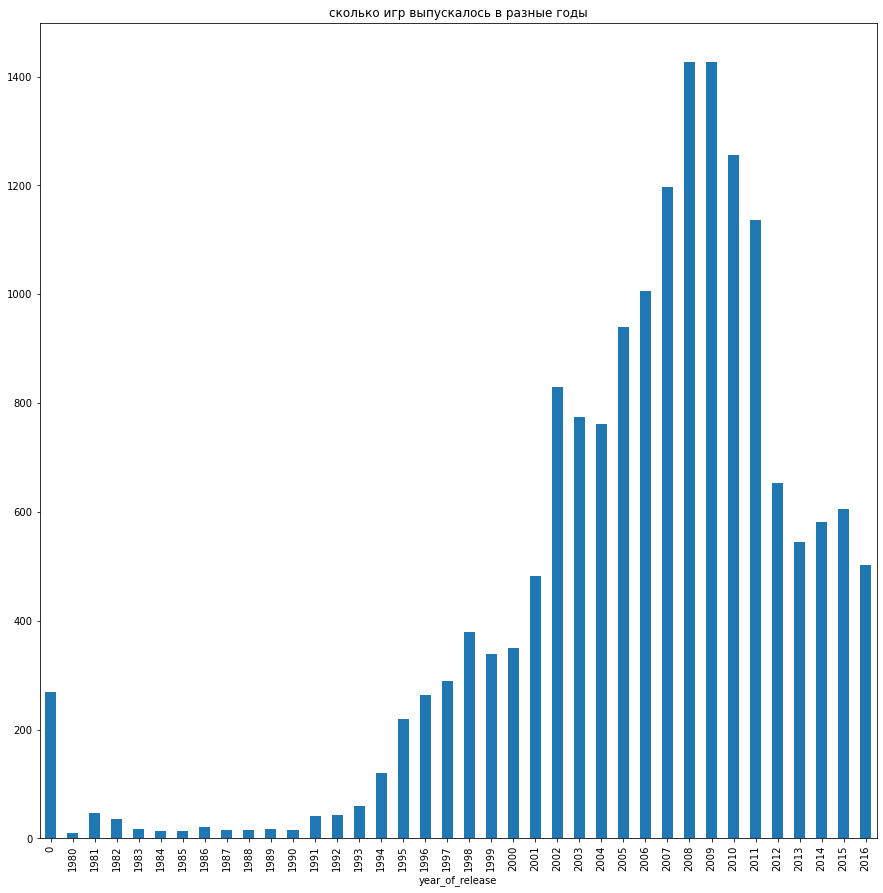

In [26]:
# Для начала посмотрим сколько игр выпускалось в разные годы.
plt.figure(figsize=(15, 15))
df.groupby('year_of_release')['name'].count().plot.bar(title = "сколько игр выпускалось в разные годы");

На диаграмме видно что после 2011 года количество выпускаемых игр резко пошло на спад, вероятнее всего данная тенденция связана с развитием в эти годы мобильных игр. Так как прогноз будет строиться на 2017 год возьмем данные за последние 5 лет

Теперь посмотрим как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [27]:
# выберем самые популярные платформы.
df.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

In [28]:
# сделаю срез с платформами c наибольшими продажами.
list_1 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_6 = df.query('platform in @list_1')

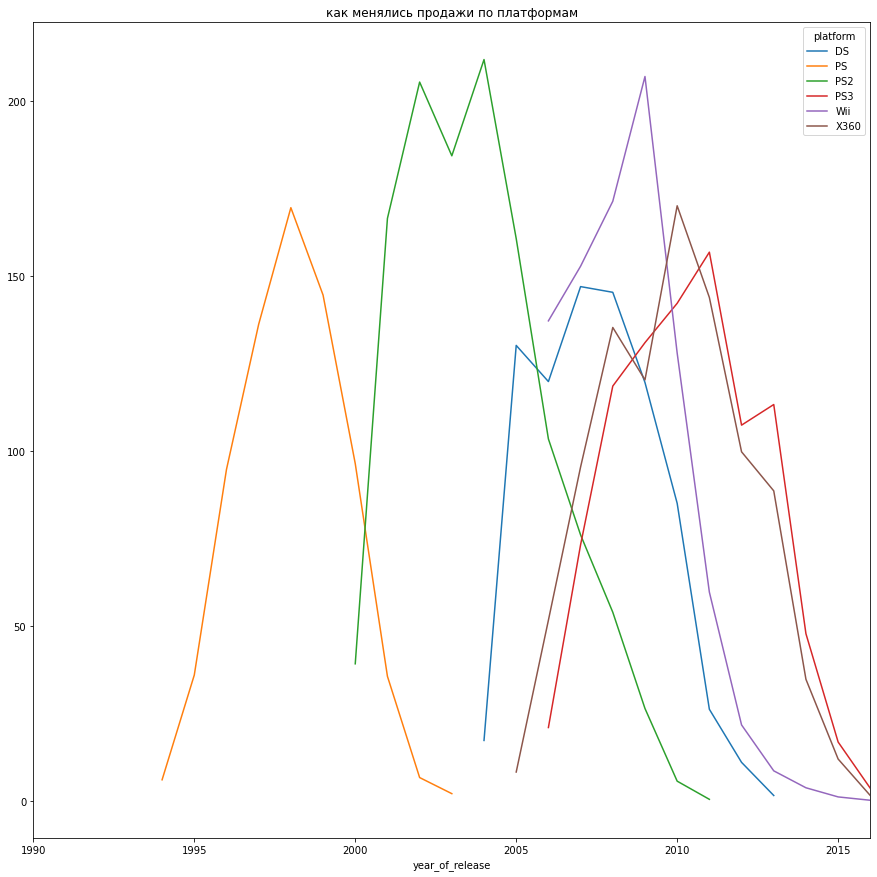

In [29]:
# посмотрим как изменялись продажи по этим платформам.
top_6.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    xlim=(1990, 2016), style='-', title = "как менялись продажи по платформам", figsize=(15, 15));

In [30]:
# создам таблицу с данными за последние 5 лет.
our_list = [2012, 2013, 2014, 2015, 2016]
df_after_2011 = df.query('year_of_release in @our_list')

In [31]:
# выберем самые популярные платформы за этот период.
df_after_2011.groupby('platform')['total_sales'].sum().sort_values()

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.79
PS4     314.14
Name: total_sales, dtype: float64

In [32]:
# сделаю срез с этими платформами.
our_list_2 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
top_10 = df_after_2011.query('platform in @our_list_2')

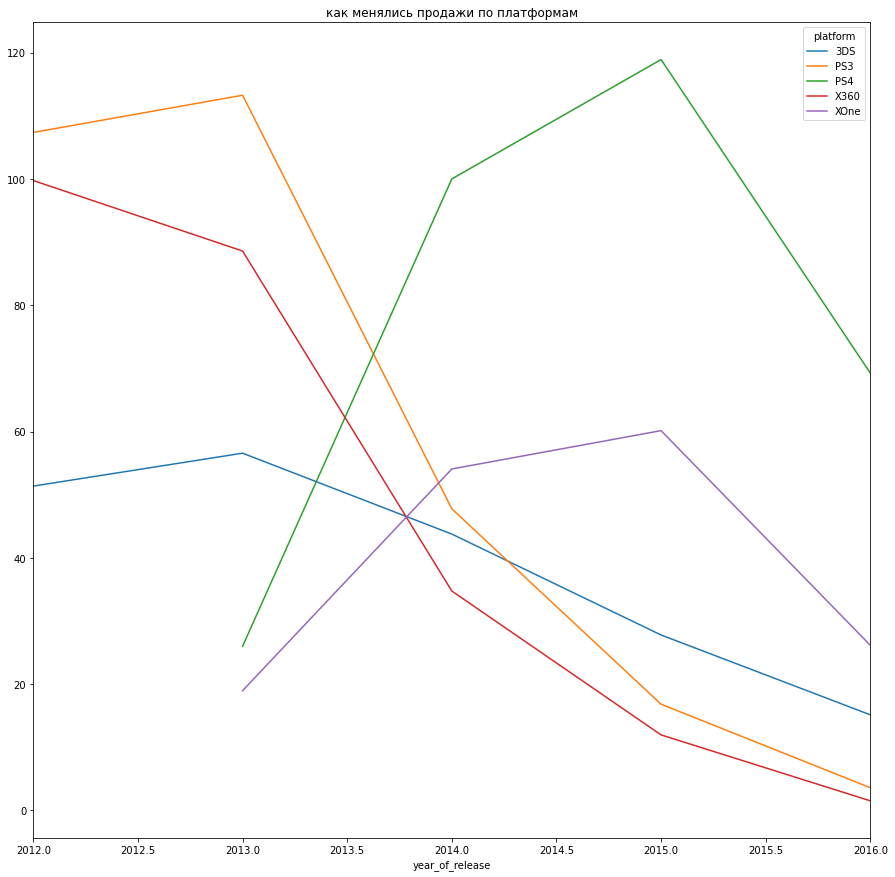

In [33]:
# посмотрим как изменялись продажи по этим платформам за пять лет.
top_10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    xlim=(2012, 2016), style='-', title = "как менялись продажи по платформам", figsize=(15, 15));

На этом графике видно что в последние годы большего всего игр продавалось для 'PS4' и 'XOne'. Причем 'PS4' сильно лидирует по сравнению с остальными платформами.

<Figure size 1080x1080 with 0 Axes>

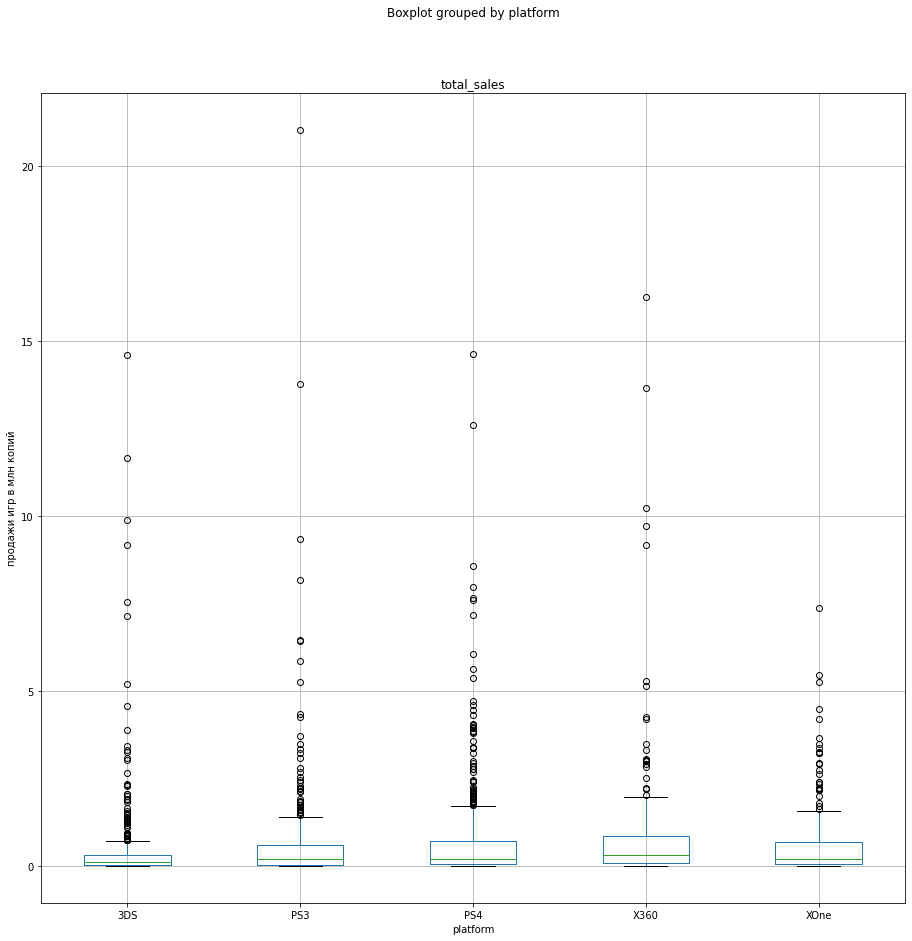

In [34]:
# посмотрим общие продажи по этим платформам за пять лет.
plt.figure(figsize=(15, 15));
top_10.boxplot(column='total_sales', by='platform', figsize=(15, 15));
plt.ylabel("продажи игр в млн копий")
plt.show()

На диаграмме ящик с усами видно что самая продаваемая игра была на платформе PS3, но в целом на каждой платформе имеются игры чьи продажи на много превышали медианное значение из-за чего наблюдается сильное смещение данных 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для анализа возьмем "PS4"

In [35]:
# сделаю срез по платформе
ps_4_data = df_after_2011.query('platform == "PS4" and user_score != -1 and critic_score != -1')

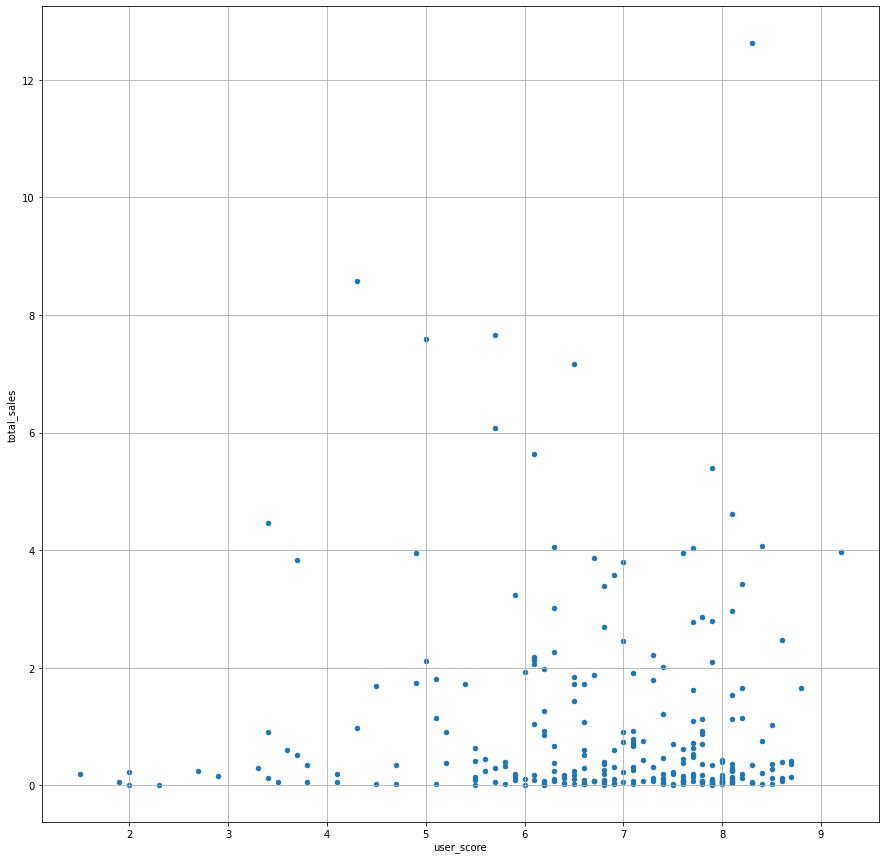

In [36]:
# Построю диаграмму рассеяния, влияние оценок пользователей на продажи
ps_4_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [37]:
# посчитаю корреляцию между отзывами и продажами
ps_4_data['total_sales'].corr(ps_4_data['user_score'])

-0.033624974472071655

По полученным данным можно сказать что отзывы пользователей никак не коррелируют с продажами, тем не менее на диаграмме видно что 
больше всего проданных игр имеют оценки выше 5 а осутствие корреляции можно обьяснить несколькими играми с большими продажами имеющих низкий рейтинг

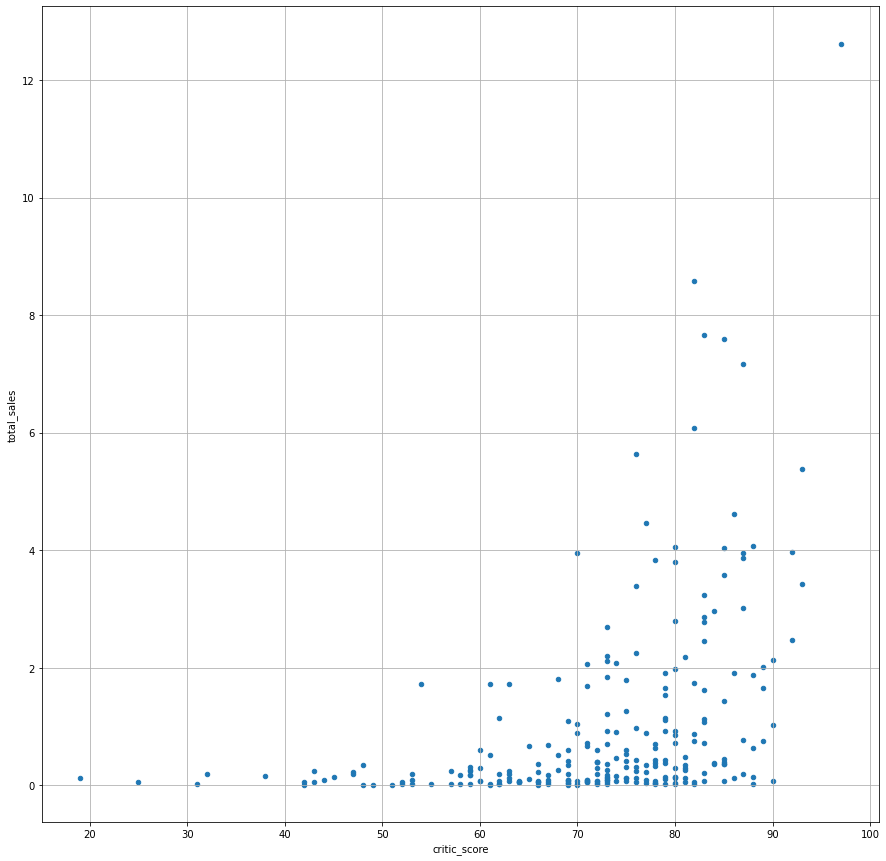

In [38]:
# Построю диаграмму рассеяния, влияние оценок критиков на продажи
ps_4_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [39]:
# посчитаю корреляцию между отзывами и продажами
ps_4_data['critic_score'].corr(ps_4_data['total_sales'])

0.4058948014583663

Здесь можно сказать что оценки критиков больше влияют на продажи чем оценки пользователей, но корреляция не столь существенна. По диаграмме видно что самые популярные игры имеют оценки выше 70

Соотнесем полученные результаты с другими платформами

In [40]:
# сделал срез
ps_3_data = df_after_2011.query('platform == "PS3" and user_score != -1 and critic_score != -1')

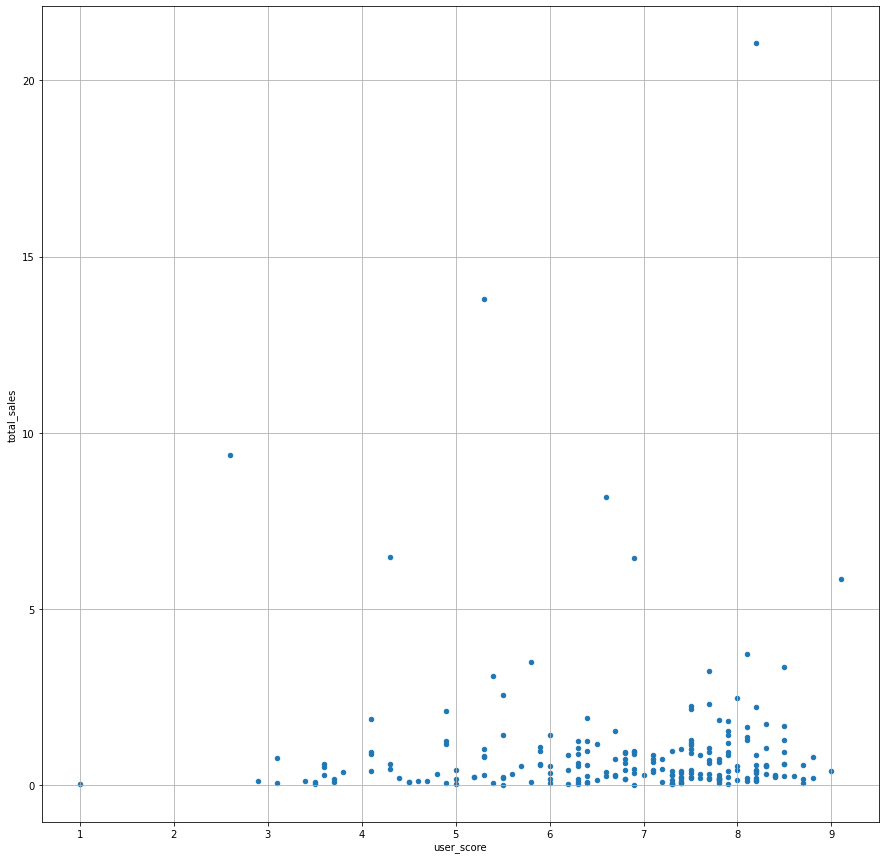

In [41]:
# Построю диаграмму рассеяния, влияние оценок пользователей на продажи
ps_3_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [42]:
# посчитаю корреляцию между отзывами и продажами
ps_3_data['total_sales'].corr(ps_3_data['user_score'])

0.0032274058814974788

Похожие результаты выходят по ps3, корреляции между отзывами пользователей и продажами нет

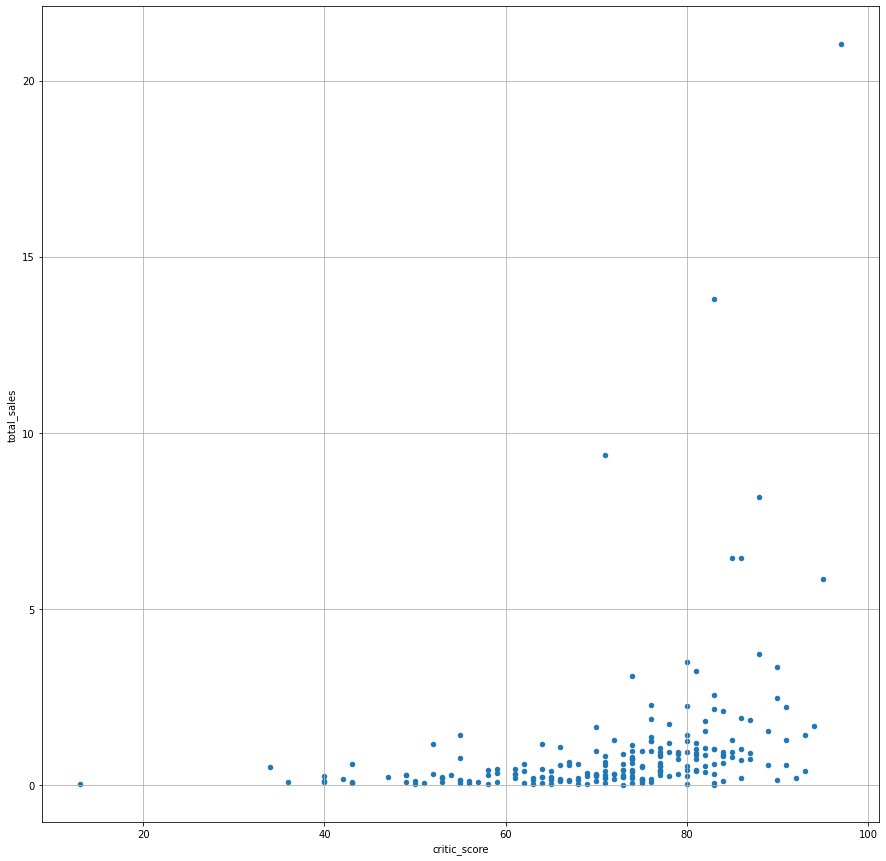

In [43]:
# Построю диаграмму рассеяния, влияние оценок критиков на продажи
ps_3_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [44]:
# посчитаю корреляцию между отзывами и продажами
ps_3_data['critic_score'].corr(ps_3_data['total_sales'])

0.3310566175801406

А корреляция оценок критиков и продажами на ps3 также довольно не большая. Посмотрим так же корреляцию на X360

In [45]:
# сделал срез
X360_data = df_after_2011.query('platform == "X360" and user_score != -1 and critic_score != -1')

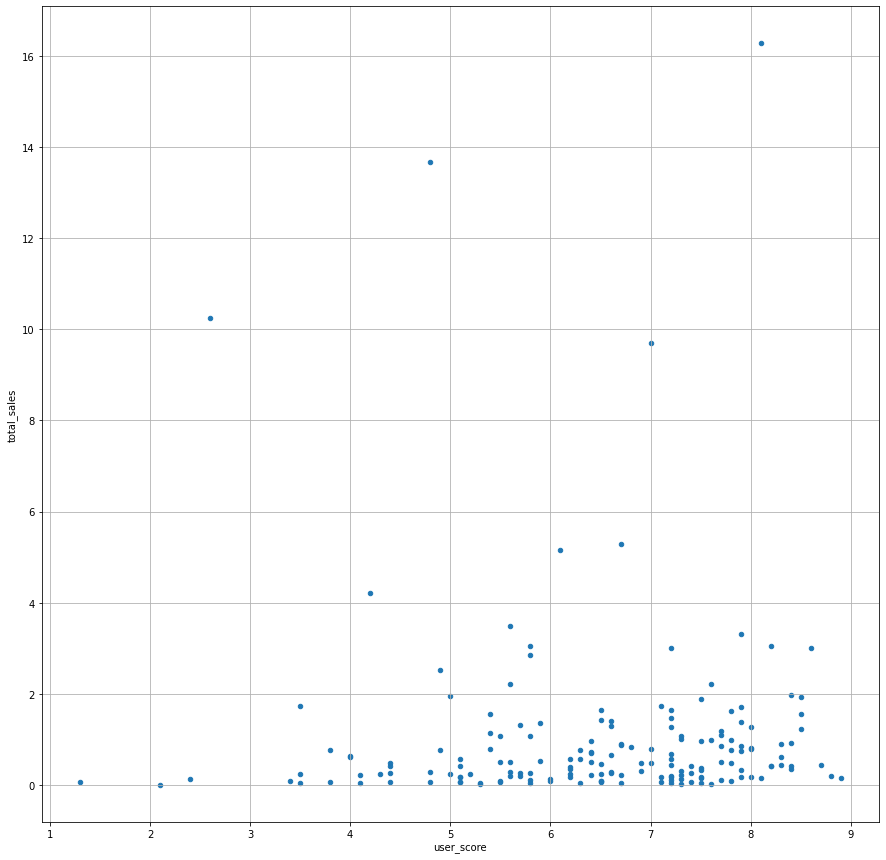

In [46]:
# Построю диаграмму рассеяния, влияние оценок пользователей на продажи
X360_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [47]:
# посчитаю корреляцию между отзывами и продажами
X360_data['total_sales'].corr(X360_data['user_score'])

-0.0020140269517310537

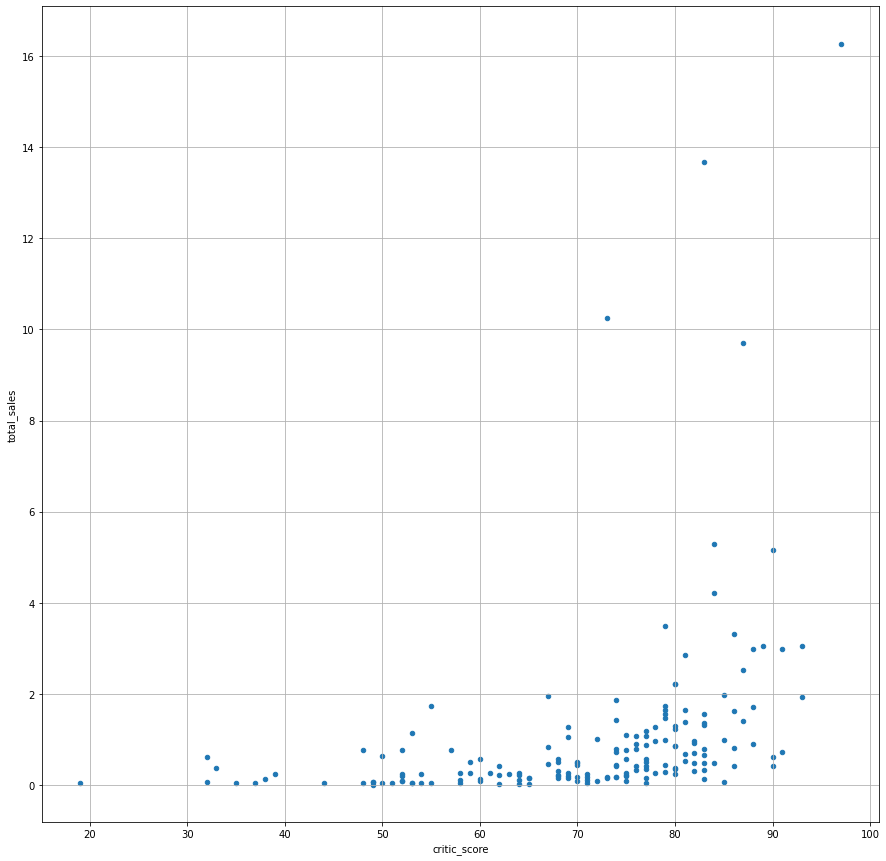

In [48]:
# Построю диаграмму рассеяния, влияние оценок критиков на продажи
X360_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 15), style='o', grid=True);

In [49]:
# посчитаю корреляцию между отзывами и продажами
X360_data['critic_score'].corr(X360_data['total_sales'])

0.36057348885073387

Итого на всех платформах из топ 3 схожая картина, взаимосвязи между оценкой пользователей и продажами игр на платформах не прослеживается, а взаимосвязь продаж с оценкой критиков крайне мала.

Теперь посмотрим на общее распределение игр по жанрам

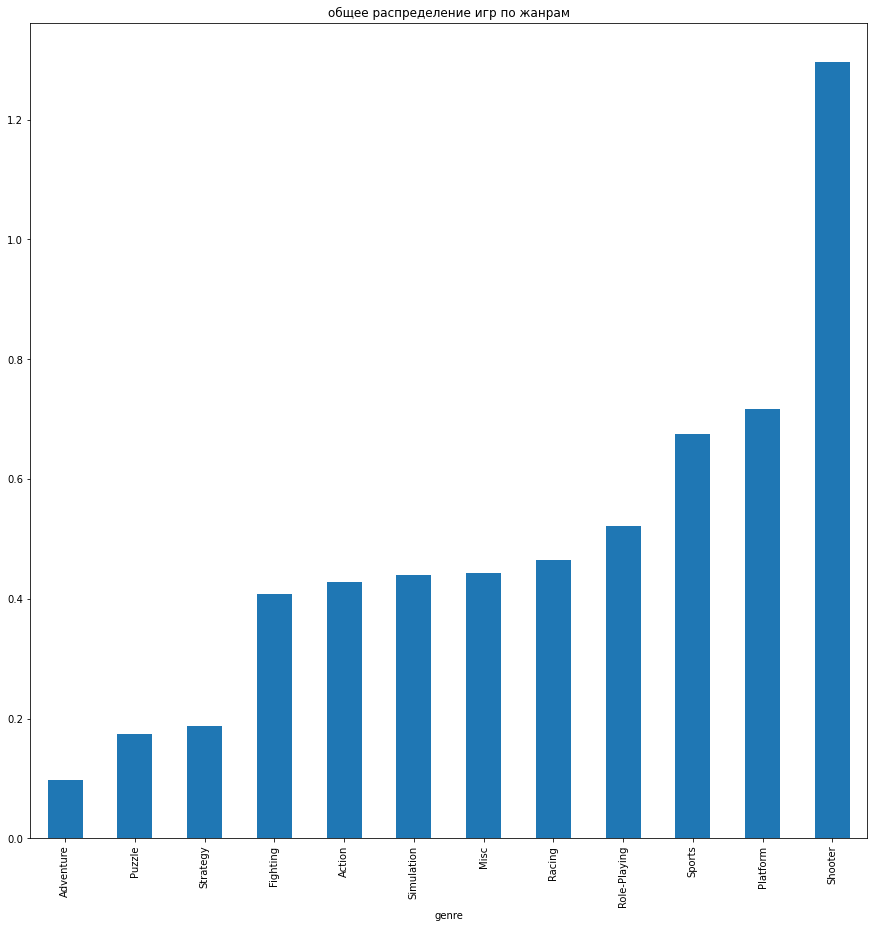

In [50]:
# построю столбчатую диаграмму со средними продажами по жанрам
plt.figure(figsize=(15, 15))
df_after_2011.groupby('genre')['total_sales'].mean().sort_values().plot.bar(title = "общее распределение игр по жанрам");

Здесь виден большой разрыв по продажам между играми жанра шутер и остальными, можно сказать что игроки предпочитают игры где действие развивается довольно динамично, еще выделяются жанры с самыми низкими средними продажами это стратегии, пазлы и приключенческий жанр.

#### Вывод:
На этом шаге я посмотрел сколько игр выпускалось в разные годы и выяснил что после 2011 неблюдается резкий спад в выпуске игр, выявил наиболее популярные платформы за последние 5 лет, посмотрел как влияют оценки пользователей и критиков на продажи а также выявил что самыми популярными жанрами игр является шутеры

### Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP и остальной мир):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Первым делом найду топ 5 платформ для каждого региона, а остальные заменю на 'другие'

In [51]:
# сгруппирую продажи по платформам в северной америке
df_after_2011.groupby('platform')['na_sales'].sum().sort_values()

platform
PSP       0.13
DS        4.59
PSV      10.98
Wii      17.45
PC       19.12
WiiU     38.10
3DS      55.31
XOne     93.12
PS3     103.38
PS4     108.74
X360    140.05
Name: na_sales, dtype: float64

In [52]:
# создам новый столбец в таблице где платформы не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
na_top = ['PS4', 'PS3', 'X360', 'XOne', '3DS']
df_after_2011['na_top'] = df_after_2011['platform']
df_after_2011['na_top'] = df_after_2011['na_top'].where(df_after_2011['na_top'].isin(na_top), 'другие')

In [53]:
# проверю значения столбца
df_after_2011['na_top'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'другие', 'XOne'], dtype=object)

In [54]:
# сгруппирую продажи по платформам в европе
df_after_2011.groupby('platform')['eu_sales'].sum().sort_values()

platform
PSP       0.42
DS        3.53
PSV      11.36
Wii      11.92
WiiU     25.13
PC       37.76
3DS      42.64
XOne     51.59
X360     74.52
PS3     106.86
PS4     141.09
Name: eu_sales, dtype: float64

In [55]:
# создам новый столбец в таблице где платформы не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
top_eu = ['PS4', 'PS3', 'X360', 'XOne', '3DS']
df_after_2011['eu_top'] = df_after_2011['platform']
df_after_2011['eu_top'] = df_after_2011['eu_top'].where(df_after_2011['eu_top'].isin(top_eu), 'другие')

In [56]:
# проверю значения столбца
df_after_2011['eu_top'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'другие', 'XOne'], dtype=object)

In [57]:
# сгруппирую продажи по платформам в японии
df_after_2011.groupby('platform')['jp_sales'].sum().sort_values()

platform
PC       0.00
XOne     0.34
X360     1.57
Wii      3.39
DS       3.72
PSP     10.47
WiiU    13.01
PS4     15.96
PSV     21.04
PS3     35.29
3DS     87.79
Name: jp_sales, dtype: float64

In [58]:
# создам новый столбец в таблице где платформы не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
top_jp = ['PS4', 'PS3', 'PSV', 'WiiU', '3DS']
df_after_2011['jp_top'] = df_after_2011['platform']
df_after_2011['jp_top'] = df_after_2011['jp_top'].where(df_after_2011['jp_top'].isin(top_jp), 'другие')

In [59]:
# проверю значения столбца
df_after_2011['jp_top'].unique()

array(['PS3', 'другие', 'PS4', '3DS', 'WiiU', 'PSV'], dtype=object)

In [60]:
# сгруппирую продажи по платформам в остальном мире
df_after_2011.groupby('platform')['other_sales'].sum().sort_values()

platform
PSP      0.17
DS       0.71
Wii      2.61
PC       5.77
PSV      5.80
WiiU     5.95
3DS      8.87
XOne    14.27
X360    20.40
PS3     43.26
PS4     48.35
Name: other_sales, dtype: float64

In [61]:
# создам новый столбец в таблице где платформы не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
top_other = ['PS4', 'PS3', 'X360', 'XOne', '3DS']
df_after_2011['other_top'] = df_after_2011['platform']
df_after_2011['other_top'] = df_after_2011['other_top'].where(df_after_2011['other_top'].isin(top_other), 'другие')

In [62]:
# проверю значения столбца
df_after_2011['other_top'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'другие', 'XOne'], dtype=object)

In [63]:
# посмотрим новые столбцы в таблице
df_after_2011.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,na_top,eu_top,jp_top,other_top
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,PS3,PS3,PS3,PS3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,X360,X360,другие,X360
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63,PS4,PS4,PS4,PS4
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60,3DS,3DS,3DS,3DS
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,PS3,PS3,PS3,PS3


In [64]:
# Создам сводные таблицы сумма продаж по платформам
na = df_after_2011.pivot_table(index='na_top', values='na_sales', aggfunc='sum')
na.reset_index(inplace = True)

In [65]:
eu = df_after_2011.pivot_table(index='eu_top', values='eu_sales', aggfunc='sum')
eu.reset_index(inplace = True)

In [66]:
jp = df_after_2011.pivot_table(index='jp_top', values='jp_sales', aggfunc='sum')
jp.reset_index(inplace = True)

In [67]:
other = df_after_2011.pivot_table(index='other_top', values='other_sales', aggfunc='sum')
other.reset_index(inplace = True)

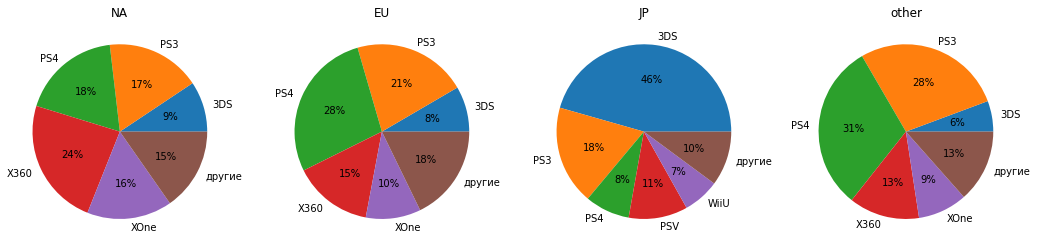

In [68]:
# Посмотрим распределение по платформам на круговой диаграмме
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 18))
ax1.pie(na['na_sales'], autopct='%.0f%%', labels=na['na_top'],
      frame=False)
ax2.pie(eu['eu_sales'], autopct='%.0f%%', labels=eu['eu_top'],
      frame=False)
ax3.pie(jp['jp_sales'], autopct='%.0f%%', labels=jp['jp_top'],
      frame=False)
ax4.pie(other['other_sales'], autopct='%.0f%%', labels=other['other_top'],
      frame=False)
ax1.set_title("NA")
ax2.set_title("EU")
ax3.set_title("JP")
ax4.set_title("other")
plt.show()

На диаграммах видно что в Европе и в остальном мире самыми популярными платформами являются 'PS4' и 'PS3', в Америке же это X360 и различия в долях распределены боллее равномерно среди остальных платформ чем в остальных регионах. Самая популярная платформа в Японии 3DS занимает почти 50% рынка но нигде в остальном мире даже не входит топ 3 по популярности.

Теперь посмотрим топ 5 жанров по регионам, сперва отфильтруем данные

In [69]:
# сгруппирую продажи по жанрам в северной америке
df_after_2011.groupby('genre')['na_sales'].sum().sort_values()

genre
Puzzle            1.13
Strategy          4.23
Simulation        7.97
Adventure         8.92
Racing           17.22
Fighting         19.79
Platform         25.38
Misc             38.19
Role-Playing     64.00
Sports           81.53
Shooter         144.77
Action          177.84
Name: na_sales, dtype: float64

In [70]:
# создам новый столбец в таблице где жанры не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
na_top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
df_after_2011['na_top_genres'] = df_after_2011['genre']
df_after_2011['na_top_genres'] = df_after_2011['na_top_genres'].where(df_after_2011['na_top_genres'].isin(na_top_genres), 'другие')

In [71]:
# проверю значения столбца
df_after_2011['na_top_genres'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'другие', 'Misc', 'Sports'],
      dtype=object)

In [72]:
# сгруппирую продажи по жанрам в европе
df_after_2011.groupby('genre')['eu_sales'].sum().sort_values()

genre
Puzzle            1.40
Strategy          5.17
Adventure         9.46
Fighting         10.79
Simulation       14.55
Platform         21.41
Misc             26.32
Racing           27.29
Role-Playing     48.53
Sports           69.09
Shooter         113.47
Action          159.34
Name: eu_sales, dtype: float64

In [73]:
# создам новый столбец в таблице где жанры не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
eu_top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
df_after_2011['eu_top_genres'] = df_after_2011['genre']
df_after_2011['eu_top_genres'] = df_after_2011['eu_top_genres'].where(df_after_2011['eu_top_genres'].isin(eu_top_genres), 'другие')

In [74]:
# проверю значения столбца
df_after_2011['eu_top_genres'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'другие', 'Sports', 'Racing'],
      dtype=object)

In [75]:
# сгруппирую продажи по жанрам в японии
df_after_2011.groupby('genre')['jp_sales'].sum().sort_values()

genre
Puzzle           2.14
Racing           2.50
Strategy         2.88
Sports           8.01
Adventure        8.24
Platform         8.63
Shooter          9.23
Fighting         9.44
Simulation      10.41
Misc            12.86
Action          52.80
Role-Playing    65.44
Name: jp_sales, dtype: float64

In [76]:
# создам новый столбец в таблице где жанры не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
jp_top_genres = ['Action', 'Simulation', 'Misc', 'Role-Playing', 'Fighting']
df_after_2011['jp_top_genres'] = df_after_2011['genre']
df_after_2011['jp_top_genres'] = df_after_2011['jp_top_genres'].where(df_after_2011['jp_top_genres'].isin(jp_top_genres), 'другие')

In [77]:
# проверю значения столбца
df_after_2011['jp_top_genres'].unique()

array(['Action', 'другие', 'Role-Playing', 'Misc', 'Simulation',
       'Fighting'], dtype=object)

In [78]:
# сгруппирую продажи по жанрам в остальном мире
df_after_2011.groupby('genre')['other_sales'].sum().sort_values()

genre
Puzzle           0.22
Strategy         1.06
Simulation       2.19
Adventure        2.81
Fighting         4.47
Platform         5.58
Racing           6.49
Misc             7.67
Role-Playing    14.83
Sports          22.44
Shooter         37.26
Action          51.14
Name: other_sales, dtype: float64

In [79]:
# создам новый столбец в таблице где жанры не из топ 5 заменю на 'другие'
warnings.filterwarnings("ignore")
other_top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
df_after_2011['other_top_genres'] = df_after_2011['genre']
df_after_2011['other_top_genres'] = df_after_2011['other_top_genres'].where(df_after_2011['other_top_genres'].isin(other_top_genres), 'другие')

In [80]:
# проверю значения столбца
df_after_2011['other_top_genres'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'другие', 'Misc', 'Sports'],
      dtype=object)

In [81]:
# Создам сводные таблицы сумма продаж по жанрам
na_genres = df_after_2011.pivot_table(index='na_top_genres', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
na_genres.reset_index(inplace = True)
eu_genres = df_after_2011.pivot_table(index='eu_top_genres', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
eu_genres.reset_index(inplace = True)
jp_genres = df_after_2011.pivot_table(index='jp_top_genres', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
jp_genres.reset_index(inplace = True)
other_genres = df_after_2011.pivot_table(index='other_top_genres', values='other_sales', aggfunc='sum').sort_values(by='other_sales')
other_genres.reset_index(inplace = True)

In [82]:
# Обьединю все таблицы и добавлю столбец со списком жанров
all_top_genres = pd.concat([na_genres, eu_genres, jp_genres, other_genres], sort=False, axis=0)
all_top_genres['all_genres'] = ['Misc', 'Role-Playing', 'Sports', 'другие', 'Shooter', 'Action', 'Racing', 'Role-Playing', 
                                'Sports', 'другие', 'Shooter', 'Action', 'Fighting', 'Simulation', 'Misc', 'другие', 'Action', 
                                'Role-Playing', 'Misc', 'Role-Playing', 'Sports', 'другие', 'Shooter', 'Action']

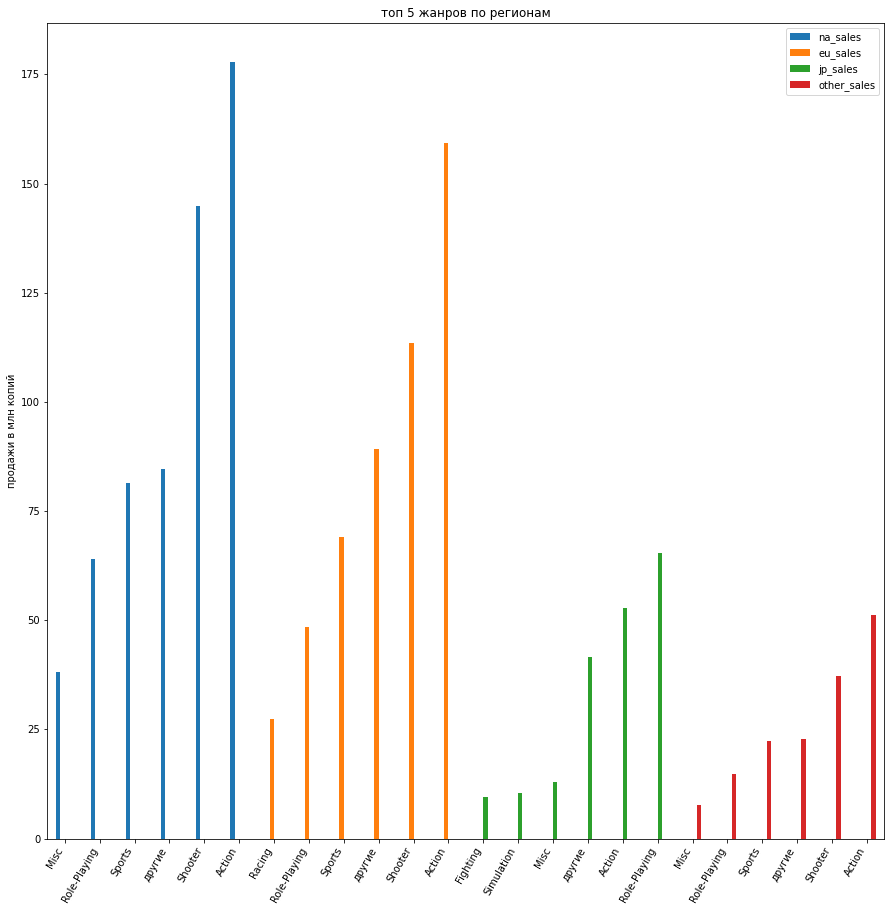

In [83]:
# Посмотрим различия по продажам по жанрам по всем регионам
all_top_genres.plot(kind='bar', figsize=(15, 15))
plt.gca().set_xticklabels(all_top_genres['all_genres'], rotation=60, horizontalalignment= 'right')
plt.ylabel("продажи в млн копий")
plt.title("топ 5 жанров по регионам")
plt.show()

По диаграмме хорошо видно что Европа и Америка основные рынки сбыта для игр и доминируют там жанры экшен и шутер и в целом предпочтения в жанрах игр довольно схожи, выделяется снова Япония где самый популярный жанр ролевой игры а также в топ 5 симуляции и файтинг, чего нет в топах других регионов

Исследуем также влияние возрастного рейтинга на продажи по регионам

In [84]:
# Создам таблицу с суммой продаж по регионам по рейтингу
na_rating = df_after_2011.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
na_rating.reset_index(inplace = True)
eu_rating = df_after_2011.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
eu_rating.reset_index(inplace = True)
jp_rating = df_after_2011.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
jp_rating.reset_index(inplace = True)
other_rating = df_after_2011.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales')
other_rating.reset_index(inplace = True)
all_top_rating = pd.concat([na_rating, eu_rating, jp_rating, other_rating], sort=False, axis=1)
all_top_rating

,rating,na_sales,rating,eu_sales,rating,jp_sales,rating,other_sales
0,T,66.02,T,52.96,E10+,8.19,E10+,16.23
1,E10+,75.70,E10+,55.37,M,21.20,T,17.94
2,unknown,103.31,unknown,91.50,T,26.02,unknown,27.17
3,E,114.37,E,113.03,E,28.33,E,31.44
4,M,231.57,M,193.96,unknown,108.84,M,63.38


Здесь также видно что во всем мире самые продаваемые игры с взрослым рейтингом и на втором месте игры для всех, тогда как в Японии на первом месте игры с неизвестным возрастным рейтингом, а на втором также для всех. Возможно причина неизвестного рейтинга и его популярности в Японии что это местный продукт для которого ассоциация ESRB не выставляла рейтинг.

#### Вывод:
По полученным данным можно составить характерный портрет пользователя для каждого региона, для Европы и Америки это будет игрок использующий PS или XBOX, играющий в игры жанра экшен и шутер со взрослым рейтингом, для Японии же это будет играющий на 3DS в игру жанра ролевые или так же экшен но с рейтингом игры неизвестным.

### Шаг 5. Проверка гипотез

* 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для этого сформируем гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC существенно не различаются и альтернативную H1: В средних пользовательских рейтингах платформ Xbox One и PC есть существенные различия . Я буду использовать t-критерий Стьюдента так как он подходит для проверки равенства средних значений в двух выборках. Для выявления существенности различий пороговое значение alpha задам равным 0,05

In [85]:
# Сделаю срезы с нужными параметрами
XOne = df_after_2011.query('platform == "XOne" and user_score != -1')
PC = df_after_2011.query('platform == "PC" and user_score != -1')

In [86]:
# Посмотрим на дисперсию значений оценок платформы Xbox One
np.var(XOne['user_score'])

1.8965187072753906

In [87]:
# Посмотрим на дисперсию значений оценок платформы PC
np.var(PC['user_score'])

2.756995439529419

In [88]:
# Проведем Т-тест на равенство двух средних
results = st.ttest_ind(XOne['user_score'], PC['user_score'], equal_var = False)
# equal_var - равен False так как дисперсии выборок отличаются
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('p-значение: ', results.pvalue)

Не получилось отвергнуть нулевую гипотезу
p-значение:  0.5489560454239967


По результатам теста отклонить нулевую гипотезу мы не можем, что значит вероятнее всего средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые. Посмотрим распределение значений по этим выборкам.

In [89]:
# Распределение значений по Xbox One
XOne['user_score'].describe()

count    182.000000
mean       6.521427
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [90]:
# Распределение значений по РС
PC['user_score'].describe()

count    206.000000
mean       6.428643
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Действительно средние оценки очень близки друг к другу а медианы и вовсе одинаковы, что подтверждает нулевую гипотезу

* 2. Средние пользовательские рейтинги жанров Action  и Sports разные.

Для этого также сформируем две гипотезы H0: Средние пользовательские рейтинги жанров Action  и Sports существенно не различаются и альтернативную H1: В средних пользовательских рейтингах жанров Action  и Sports есть существенные различия. Для выявления различий использоваться также будет t-критерий Стьюдента, пороговое значение alpha задам равным 0,05

In [91]:
# Сделаю срезы с нужными параметрами
Action = df_after_2011.query('genre == "Action" and user_score != -1')
Sports = df_after_2011.query('genre == "Sports" and user_score != -1')

In [92]:
# Посмотрим на дисперсию значений оценок жанра экшен
np.var(Action['user_score'])

1.8854718208312988

In [93]:
# Посмотрим на дисперсию значений оценок жанра спорт
np.var(Sports['user_score'])

3.0073883533477783

In [94]:
# Проведем Т-тест на равенство двух средних
results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var = False)
# equal_var - равен False так как дисперсии выборок отличаются
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('p-значение: ', results.pvalue)

Отвергаем нулевую гипотезу
p-значение:  4.2428970996510126e-20


По результатам теста мы отклоняем нулевую гипотезу, что значит вероятнее всего средние пользовательские рейтинги жанров  экшен и спорт действительно разные. Посмотрим распределение значений по этим выборкам.

In [95]:
# Распределение значений по жанру спорт
Sports['user_score'].describe()

count    195.000000
mean       5.455898
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [96]:
# Распределение значений по жанру экшен
Action['user_score'].describe()

count    523.000000
mean       6.825051
std        1.374439
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Средняя и медиана у этих выборок действительно довольно сильно различаются, что также подтверждает первую гипотезу

## Вывод:
В этом исследовании я анализировал данные по продажам игр с 1980-2016 год, целью исследования было выявить определяющие успешность игры закономерности. Перед началом анализа я провел предобработку данных, в таблице имелось большое количество пропущенных значений, пропуски я заменил на нейтральные значения так как не имел возможности их восстановить и не удалял дабы не потерять нужные для анализа данные. 

На этапе анализа мною было выявлено что после 2011 года пошел резкий спад в выпуске новых игр, что я связываю в первую очередь с развитием мобильных игр и тем что возможно сейчас разработка новых игр довольно затратный процесс и многие разработчики стараются заработать на перевыпуске старых игр, в том числе оптимизированных под смартфоны. В целом по анализу можно сказать что средняя жизнь игровой платформы равняется 10 годам.

Также я нашел наиболее популярные платформы в период с 2012-2016 года коими стали 'PS4', 'PS3', 'X360', '3DS' и 'XOne'. Но у всех них также идет тенденция на снижение количества выпускаемых на них игр.

По влиянию оценок на продажи можно сказать что оценки критиков и пользователей не коррелирует на прямую с продажами и не сильно на них влияют.

Самые популярные игры по жанрам это шутеры, по крайней мере в Америке, Европе и остальном мире кроме Японии где на первом месте стоят ролевые игры, самые не популярные это стратегии, пазлы и приключения. 

Также Япония отметилась тем что самая популярная игровая платформа там это nintendo 3DS, тогда как в остальных регионах это PS или XBOX и тем что наибольшее количество проданных игр там не имеют рейтинга от ESRB что скорее всего связано с тем, что в Японии более популярны игры местных разработчиков, тогда как в остальном мире это игры разработанные в США и Европе и имеющие взрослый рейтинг.

Еще в ходе анализа я проверил гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, проведенный мною статистический тест не смог опровергнуть эту гипотезу. Другая гипотеза что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, также не была отвергнута так как не протеворечила результатам проведенного теста.